# Analyzing a dataset and performing a classification analysis

## Import our libraries

In [169]:
#Import standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import random
%matplotlib inline

In [170]:
#Import modules specific to the machine learning aspect of this analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Import classification algorithm modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture

## Read the data

In [171]:
df = pd.read_csv('bank.csv')

In [172]:
df.head(n=20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


The objective in this exercise is to analyze the data, extract some meaningful insights about the features and their relationship to the outcome (deposit = yes or no), come up with some strategies for future campaigns, and build a predictive model that will allow us in the future to determine whether or not a customer will subscribe (deposit = yes)

**Brief explanation of the "not so intuitive" features**

Housing - has a house loan

Loan - has a personal loan

Month - last contact month

Day - last contact day

Duration - last contact duration (phone call)

Campaign - number of contacts performed during this campaign and for this client

Pdays - number of days since **previous** contact

Poutcome - outcome of **previous** marketing campaign and for this client

Deposit - this is the dependent variable that we are going to want to build a predictive model to classify, describes whether or not a client subscribed a term deposit (deposit = yes) 

In [173]:
df.describe(exclude = None)

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Lets change the dependent variable to a binary outcome (0 if no, 1 if yes)

In [174]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [175]:
df['deposit'] = df['deposit'].map({'yes' : 1, 'no' : 0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [176]:
#delete some features
df.drop(['contact','pdays'], axis = 1, inplace = True)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,0,unknown,1


In [177]:
df['deposit'].mean()

0.4738398136534671

By looking at the mean of our dependent variable, we can see that the dataset isnt too imbalanced.

Now, lets do some exloratory analysis.

In [178]:
age_success = df['age'][df['deposit'] == 1].value_counts()
age_success.sort_index(inplace = True)
age_success.head(n=10)

18      7
19     11
20     15
21     22
22     40
23     44
24     68
25    113
26    134
27    141
Name: age, dtype: int64

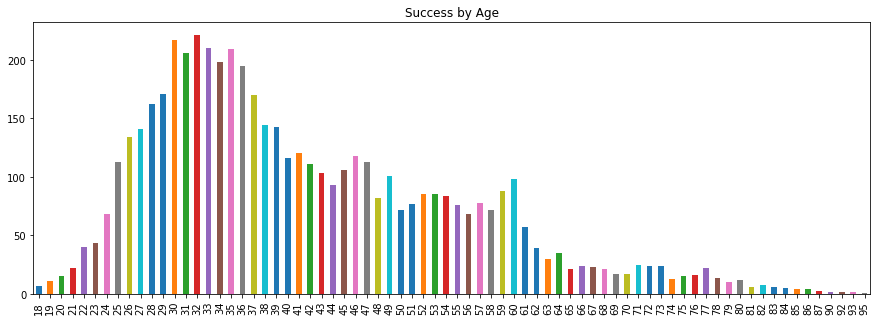

In [179]:
age_success.plot(kind='bar', figsize = (15, 5), title = 'Success by Age')

In [180]:
age_fail = df['age'][df['deposit'] == 0].value_counts()
age_fail.sort_index(inplace = True)
age_fail.head(n=10)

18      1
19      2
20      5
21      8
22      8
23     24
24     27
25     55
26    101
27    105
Name: age, dtype: int64

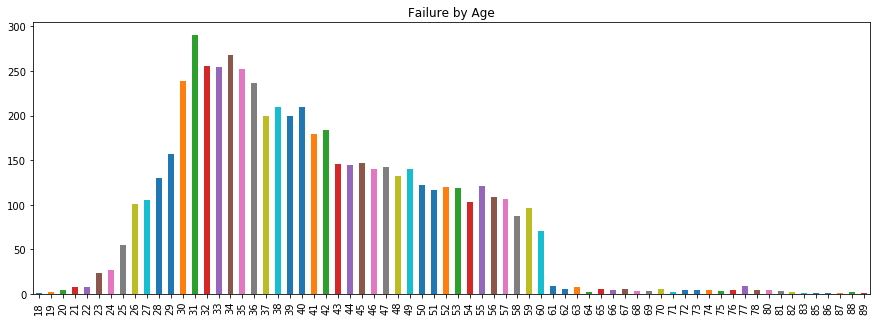

In [181]:
age_fail.plot(kind='bar', figsize = (15, 5), title = 'Failure by Age')

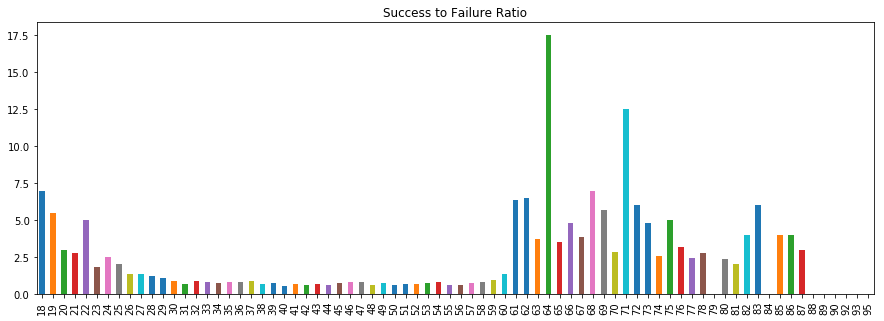

In [182]:
age_ratio = age_success / age_fail
age_ratio.plot(kind='bar', figsize = (15, 5), title = 'Success to Failure Ratio')

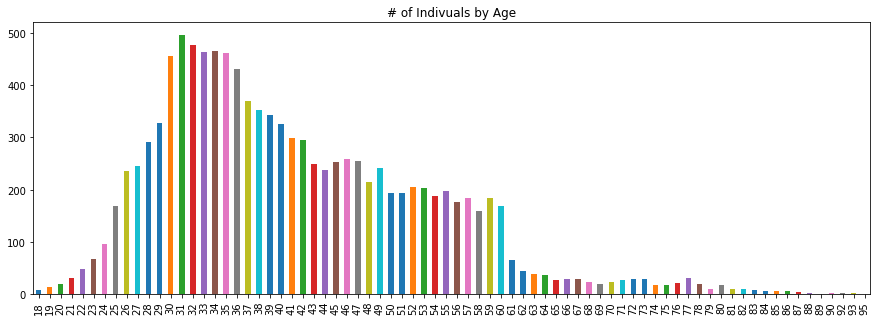

In [183]:
df['age'].value_counts().sort_index().plot(kind = 'bar', figsize = (15,5), title = '# of Indivuals by Age')

## Insight #1
Although individuals between the ages of 22-60 account for most of the successful deposits, they also account for most of the failures. Furthermore, we can see that that age group has been historically prioritized considering they make up most of the dataset.

We can see from the "Success to Failure Ratio" bar plot, that individuals between the ages of 61-87 have a better ratio of successful deposits to failed deposits. In other words, they seem to be more likely to subscribe, than not.

I would recommend to the marketing team to prioritize marketing to individuals in the 61-87 age group, as they are more likely to result in a successful subscription.

In [184]:
col_names = ['age','job','marital','education']
def top_5_ratio(df, col_names):
    for col in col_names:
        success = df[col][df['deposit'] == 1].value_counts()
        fail = df[col][df['deposit'] == 0].value_counts()
        ratio = success / fail
        ratio.sort_values(ascending = False, inplace = True)
        ratio = ratio.head(n=5)
        col = pd.DataFrame({col + '_ratio' : ratio.values}, index = ratio.index)
        display(col)

In [185]:
top_5_ratio(df,col_names)

,age_ratio
64,17.5
71,12.5
68,7.0
18,7.0
62,6.5


,job_ratio
student,2.956044
retired,1.969466
unemployed,1.303226
management,1.028458
unknown,0.944444


,marital_ratio
single,1.190535
divorced,0.926975
married,0.766129


,education_ratio
tertiary,1.178972
unknown,1.028571
secondary,0.809650
primary,0.650165


It seems odd that 'students' have the best job_ratio, considering that the best age_ratios are within the senior age group. Lets explore this.

In [186]:
df_ajd_stu = df[['age','job', 'deposit']][df['job'] == 'student']
df_ajd_stu.head()

,age,job,deposit
162,28,student,1
309,38,student,1
431,31,student,1
461,29,student,1
480,27,student,1


In [187]:
df_ajd_stu['age'].value_counts(sort = False)

18     8
19    13
20    17
21    20
22    30
23    27
24    30
25    39
26    28
27    30
28    30
29    17
30    16
31    10
32    11
33     6
34     3
35     3
36     7
37     3
38     4
39     2
40     2
41     1
45     1
46     1
47     1
Name: age, dtype: int64

In [188]:
top_5_ratio(df_ajd_stu, ['age'])

,age_ratio
18,7.000000
30,7.000000
24,6.500000
19,5.500000
29,4.666667


It seems that overall the senior age group holds the best success/fail deposit ratios, however, the students within the younger age groups hold the best ratios, even though overall their age groups have very low success/fail ratios.

In [189]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

## Insight #2
As we can see students, retirees, and the unemployed make up the top 3 groups within our jobs feature that have the best success/fail ratios.

The retirees and unemployed being in the top 3 correlate with our findings before on age, and how seniors seem to have the best success/fail ratios.

The students showing the best ratio, however, does not correlate with our findings; we can still gather from this finding that the students make up a majority of the successful deposit subscriptions within their respective age groups.

We can see, in the above cell, that students, retirees, and the unemployed are currently not as prioritized as other groups such as management and blue-collar workers.

I would recommend to the marketing team to once again focus on the elderly, and students within the other age groups.

In [190]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,0,unknown,1
